In [3]:
import torch
import torchvision
import pandas as pd
import torch.nn as nn
from torch.utils.data import  DataLoader, Dataset
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.io import loadmat
torch.manual_seed(1)
scaler = preprocessing.StandardScaler()
plt.style.use('seaborn')

In [7]:
df_recovered = pd.read_csv('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_recovered_global.csv') 
df_deaths  =  pd.read_csv('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_deaths_global.csv')
df_confirmed = pd.read_csv('C:\\Users\\Fahad\OneDrive - stud.uni-saarland.de\\DS project\\Dataset\\time_series_covid19_confirmed_global.csv')

In [8]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,910,925,938,945,960,980,1001,1034,1039,1044
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,741,741,744,751,757,759,780,781,781,781
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,21,24,24,38,38,40,41,42,61,61


In [9]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,309,327,357,369,384,405,426,446,451,471
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,34,34,34,34,34,35,36,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,690,698,707,715,724,732,741,751,760,767
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,6,6


In [10]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140


In [66]:
#df_confirmed[df_confirmed.columns[4:148]]
#table = pd.pivot_table(data= df_confirmed, index = 'Country/Region', columns= df_confirmed[df_confirmed.columns[4:148]])
DataWithDates = df_confirmed[df_confirmed.columns[4:148] ]

countries = np.array(df_confirmed[df_confirmed.columns[1] ])
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Central African Republic' 'Chad'
 'Chile' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Denmark' 'Denmark' 'Dj

In [47]:
DataWithDates

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,0,0,0,0,0,0,0,0,0,0,...,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102
1,0,0,0,0,0,0,0,0,0,0,...,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464
2,0,0,0,0,0,0,0,0,0,0,...,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810
3,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,852,853,853
4,0,0,0,0,0,0,0,0,0,0,...,86,86,88,91,92,96,113,118,130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,485,499,499,513,513,514,611,632,639,659
262,0,0,0,0,0,0,0,0,0,0,...,453,469,482,484,496,524,560,591,632,705
263,0,0,0,0,0,0,0,0,0,0,...,132,132,141,141,141,141,162,162,163,176
264,0,0,0,0,0,0,0,0,0,0,...,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971


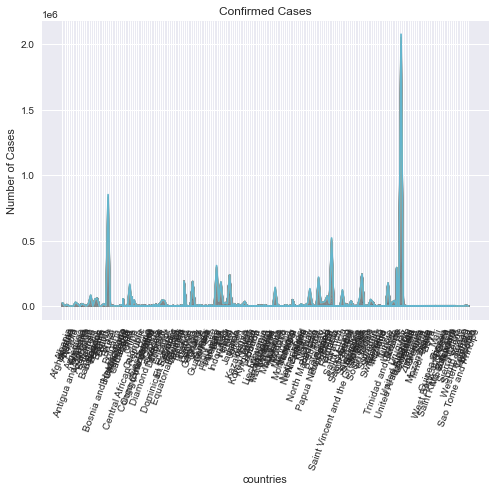

In [68]:
plt.plot(countries,DataWithDates)
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('countries') 

#y-axis labels 
plt.ylabel('Number of Cases') 

#plot title 
plt.title('Confirmed Cases') 


#display 
plt.show();

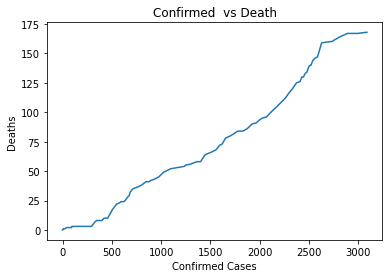

In [25]:
#plots.......
plt.plot(confirmed, deaths)
plt.title('Confirmed  vs Death')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()
